In [74]:
import pandas as pd
import numpy as np

import pylab as pl
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Ganesh\Anaconda3\envs\vin\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


ModuleNotFoundError: No module named 'seaborn'

In [4]:
BHR=pd.read_csv("C:\\Users\\Ganesh\\Desktop\\Udemy Data Science\\Bengaluru_House_Data.csv")

In [5]:
BHR.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [6]:
BHR.shape

(13320, 9)

In [7]:
data= BHR.price

In [8]:
data

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64

# detecting outliers

In [9]:
outliers=[]
def detect_outliers(data):
    
    threshold=5
    mean=np.mean(data)
    std=np.std(data)
    
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) < threshold:
            outliers.append(i)
    return outliers


In [10]:
outliers_dt=detect_outliers(BHR.bath)

In [11]:
outliers_dt

[2.0,
 5.0,
 2.0,
 3.0,
 2.0,
 2.0,
 4.0,
 4.0,
 3.0,
 6.0,
 2.0,
 5.0,
 2.0,
 2.0,
 3.0,
 2.0,
 3.0,
 3.0,
 4.0,
 2.0,
 1.0,
 3.0,
 5.0,
 3.0,
 1.0,
 3.0,
 1.0,
 3.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 3.0,
 1.0,
 1.0,
 2.0,
 9.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 4.0,
 2.0,
 3.0,
 2.0,
 5.0,
 2.0,
 8.0,
 2.0,
 2.0,
 2.0,
 7.0,
 2.0,
 3.0,
 2.0,
 3.0,
 2.0,
 3.0,
 2.0,
 2.0,
 3.0,
 1.0,
 6.0,
 2.0,
 2.0,
 2.0,
 5.0,
 7.0,
 3.0,
 2.0,
 2.0,
 6.0,
 2.0,
 2.0,
 2.0,
 4.0,
 2.0,
 3.0,
 4.0,
 2.0,
 2.0,
 3.0,
 3.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 4.0,
 3.0,
 2.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 7.0,
 3.0,
 3.0,
 1.0,
 4.0,
 3.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 8.0,
 5.0,
 3.0,
 2.0,
 2.0,
 7.0,
 3.0,
 2.0,
 3.0,
 5.0,
 4.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 4.0,
 2.0,
 2.0,
 3.0,
 4.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0

In [12]:
sorted(data)

[8.0,
 8.44,
 9.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.25,
 10.25,
 10.5,
 11.0,
 11.0,
 11.5,
 11.5,
 11.5,
 11.5,
 11.66,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.5,
 12.5,
 12.75,
 13.0,
 13.0,
 13.26,
 13.31,
 13.5,
 13.5,
 13.5,
 13.57,
 13.86,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.04,
 14.04,
 14.04,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.135,
 15.5,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.45,
 16.45,
 16.45,
 16.45,
 16.45,
 16.45,
 16.45,
 16.45,
 16.45,
 16.45,
 16.45,
 16.5,
 16.5,
 16.5,
 16.5,
 16.5,
 16.5,
 16.6,
 16.75,
 16.75,
 16.9,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.09,
 17.19,
 17.5,
 17.5,
 17.535,
 17.835,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.41,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 19.0,
 19.0,
 19

In [13]:
quantile1, quantile3=np.percentile(data,[25,75])

In [14]:
print(quantile1, quantile3)

50.0 120.0


In [15]:
iqr_value = quantile3-quantile1
print(iqr_value)

70.0


In [16]:
##lower * higherbound vals

lower_bound_val= quantile1-(1.5*iqr_value)
high_bound_val= quantile3+(1.5*iqr_value)

In [17]:
print(lower_bound_val,high_bound_val)

-55.0 225.0


In [18]:
BHR.groupby('area_type')['area_type'].agg('count').sort_values(ascending=False)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [19]:
df=BHR.drop(['society', 'balcony','availability'], axis=1)

In [20]:
df

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [21]:
df.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [22]:
df2 = df.dropna()

In [23]:
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [24]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Ganesh\Anaconda3\envs\vin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [27]:
 df2[df2.bhk>20]

,area_type,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [28]:
df2[df2.bhk<3].shape

(6176, 7)

In [29]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [30]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [31]:
df2[df2['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [32]:
df2[~df2['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [104]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [105]:
convert_sqft_to_num('1056')

1056.0

In [106]:
convert_sqft_to_num('2830 - 2882')

2856.0

In [107]:
df3=df2.copy()

In [108]:
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)

In [109]:
df3

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [110]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [111]:
df3.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                    2475
bath                             4
price                          186
bhk                              4
Name: 30, dtype: object

In [112]:
##determingin price per sft
df3['price_per_sft']=df3['price']*100000/df3['total_sqft']


In [113]:
df3.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [114]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [115]:
df3['location'].unique().shape

(1304,)

In [116]:
##strip function to remove leading space r space at end

df3.location=df3.location.apply(lambda x: x.strip())

In [117]:
location_stats=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [118]:
location_stats.head(50)

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
Hoodi                        88
KR Puram                     88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Banashankari                 74
Hormavu                      74
Kengeri                      73
Ramamurthy Nagar             73
Koramangala                  72

In [119]:
len(location_stats[location_stats<=10])

1052

In [120]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [121]:
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [122]:
df3.location=df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [123]:
len(df3.location.unique())

242

In [124]:
df3[df3.total_sqft/df3.bhk<300].head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [125]:
df3.shape

(13246, 8)

In [126]:
df3=df3.drop(['area_type'], axis=1)

In [127]:
df4=df3[~(df3.total_sqft/df3.bhk<300)]

In [128]:
df4.shape

(12502, 7)

In [129]:
df4.price_per_sft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sft, dtype: float64

# outlier treatment

In [130]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sft)
        st=np.std(subdf.price_per_sft)
        reduced_df=subdf[(subdf.price_per_sft>(m-st)) & (subdf.price_per_sft<=m+st)]
        df_out=pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out


In [131]:
df5=remove_outliers(df4)

In [132]:
df5.shape

(10241, 7)

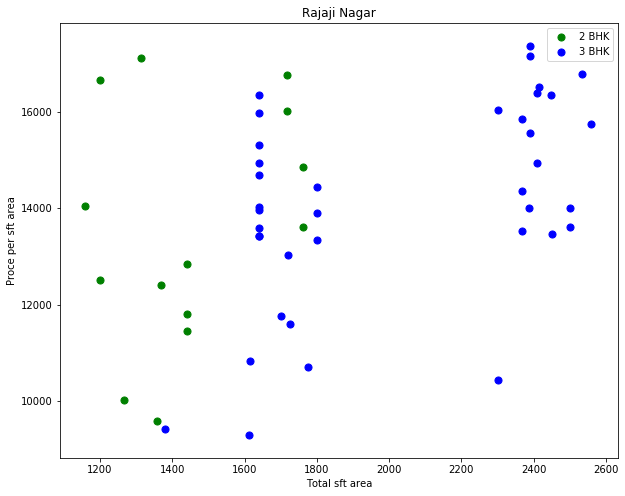

In [133]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)] 
    plt.figure(figsize=(10,8))
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sft, color='green',label='2 BHK', s=50, )
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sft, color='blue',label='3 BHK', s=50, )
    plt.xlabel("Total sft area")
    plt.ylabel("Proce per sft area")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")    
    

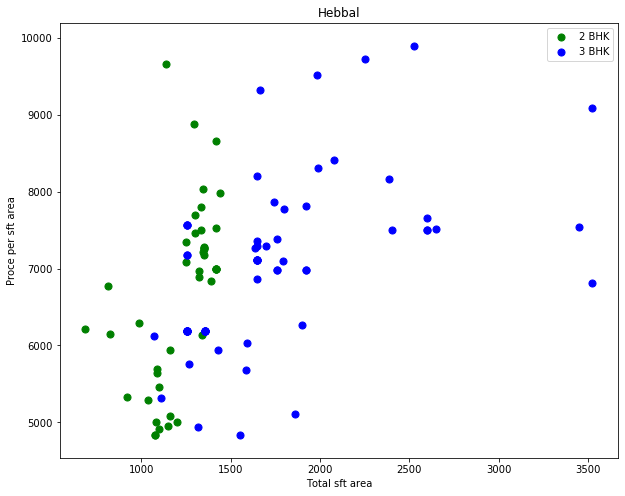

In [134]:
plot_scatter_chart(df5,"Hebbal") 

In [135]:
def remove_bhkouters(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats ={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sft),
                'std': np.std(bhk_df.price_per_sft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices, bhk_df[bhk_df.price_per_sft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')              

In [136]:
df6=remove_bhkouters(df5)

In [137]:
df6.shape

(7329, 7)

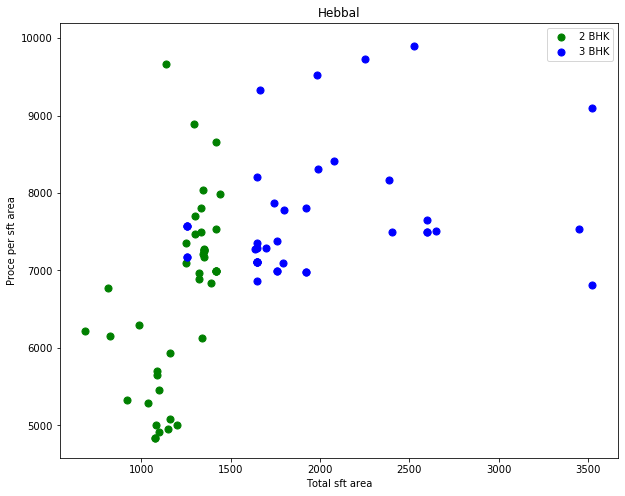

In [138]:
plot_scatter_chart(df6,"Hebbal")

In [139]:
df7=df6.drop(['price_per_sft', 'size'], axis=1)

In [140]:
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [141]:
dums=pd.get_dummies(df7.location)

In [142]:
dums

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [143]:
df8=pd.concat([df6,dums.drop('other', axis='columns')], axis='columns')

In [144]:
df8.head(1)

,location,size,total_sqft,bath,price,bhk,price_per_sft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54386,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
df9=df8.drop('location', axis=1 )

In [146]:
df9.head()

,size,total_sqft,bath,price,bhk,price_per_sft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2 BHK,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
df9.shape

(7329, 247)

In [148]:
X=df9.drop(['price', 'price_per_sft'], axis=1)

In [188]:
X.shape

(7329, 244)

In [164]:
X=X.drop('size', axis=1 )

In [165]:
y=df9.price

In [151]:
y.shape

(7329,)

In [166]:
from sklearn.model_selection import train_test_split
X_train, x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=10)

In [194]:
X_train.shape

(5130, 244)

In [168]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
lr_clf.score(x_test,y_test)

0.8430958039478358

In [170]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
        
    return lr_clf.predict([x])[0]
    

In [171]:
predict_price('1st Phase JP Nagar', 1000,2,2)

87.57387949469197

In [172]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [181]:
X_train.shape[1]

244

In [173]:
classifier = Sequential()

In [198]:
classifier.add(Dense(units=50,kernel_initializer = 'normal', activation = 'relu', input_dim = X_train.shape[1]))

In [202]:
classifier.add(Dense(units = 500, kernel_initializer = 'normal', activation = 'relu'))
classifier.add(Dense(units = 500, kernel_initializer = 'normal', activation = 'relu'))
classifier.add(Dense(units = 500, kernel_initializer = 'normal', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
classifier.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])

In [203]:
model=classifier.fit(X_train, y_train , batch_size =500, epochs = 20)

Epoch 1/20
5130/5130 [==============================] - 3s 502us/step - loss: 67.5506 - accuracy: 0.0076
Epoch 2/20
5130/5130 [==============================] - 1s 195us/step - loss: 51.4094 - accuracy: 0.0068
Epoch 3/20
5130/5130 [==============================] - 1s 206us/step - loss: 49.8702 - accuracy: 0.0057
Epoch 4/20
5130/5130 [==============================] - 1s 206us/step - loss: 49.3309 - accuracy: 0.0088
Epoch 5/20
5130/5130 [==============================] - 1s 200us/step - loss: 48.9792 - accuracy: 0.0107
Epoch 6/20
5130/5130 [==============================] - 1s 193us/step - loss: 49.0205 - accuracy: 0.0068
Epoch 7/20
5130/5130 [==============================] - 1s 200us/step - loss: 48.9468 - accuracy: 0.0119
Epoch 8/20
5130/5130 [==============================] - 1s 205us/step - loss: 48.8977 - accuracy: 0.0078
Epoch 9/20
5130/5130 [==============================] - 1s 201us/step - loss: 48.9613 - accuracy: 0.0107
Epoch 10/20
5130/5130 [==============================] 

In [187]:
print(model.history.keys())

dict_keys(['loss', 'accuracy'])
